$$L = -\frac{u_*^3\bar{T}}{kg\overline{w^{'}T}}$$
$$u_* = \sqrt{-\overline{u^{'}w^{'}}}$$

$$\Psi\left(\frac{z}{L}\right) = 
\begin{cases} 
     (1-a_2z/L)^{1/4} - 1 &\mbox{for} \ L < 0 \\
     -b_2z/L              &\mbox{for} \ L > 0 \\
\end{cases}
$$

$$U(z) = \frac{u_*}{k}\left[\ln\left(\frac{z}{z_o}\right)-\Psi\left(\frac{z}{L}\right)\right]$$

Where $z$ is $z_m$ and $U(z)$ is the measured mean velocity (wind speed) at the measurement height, $z$. The mean transport velocity $\bar{U}$ is calculated at the mean plume height $z = \bar{z}$ where $z = c\bar{z}$ for $L < 0$ and $z = \bar{z}$ for $L > 0$

$$z_o = \frac{z}{\exp\left[{\frac{U(z)k}{u_*}+\Psi\left(\frac{z}{L}\right)}\right]}$$

$$L_{x\_eff}+x_o = 
\begin{cases} 
     (\bar{z}/k^2)[\ln{(c\bar{z}/z_o)}-\Psi{(c\bar{z}/L)}][1-pa_1\bar{z}/(4L)]^{-1/2} &\mbox{for} \ L < 0 \\
     (\bar{z}/k^2)[\{\ln{(c\bar{z}/z_o)}+2b_2p\bar{z}/(3L)\}\{1+b_1p\bar{z}/(2L)\}+(b_1/4-b_2/6)p\bar{z}/L] &\mbox{for} \ L > 0 \\
\end{cases}
$$
$$L_{x\_eff}=L_x\cos(\theta-\theta_p)$$

$x_o$ is calculated with by setting $L_x = 0$ and $\bar{z}$ to the source height ($z_s$).

Once $x_o$ is calculated, $\bar{z}$ is calculated iteratively with $L_x$ now set as the distance to the source.

$$
s=\left\{\begin{array}{ll}
\frac{1-a_{1} c \bar{z} /(2 L)}{1-a_{1} c \bar{z} / L}+\frac{\left(1-a_{2} c \bar{z} / L\right)^{-1 / 4}}{\ln \left(c \bar{z} / z_{o}\right)-\Psi(c \bar{z} / L)} & \text { for } L<0 \\
\frac{1+2 b_{1} c \bar{z} / L}{1+b_{1} c \bar{z} / L}+\frac{1+b_{2} c \bar{z} / L}{\ln \left(c \bar{z} / z_{o}\right)+\Psi(\bar{z} / L)} & \text { for } L>0
\end{array}\right.
$$

$$
A = s\Gamma(2/s)[\Gamma(1/s)]^2 \\
B = \Gamma(2/s)[\Gamma(1/s)]
$$

$$
D_z(x, z) = \frac{A}{\bar{z}}\exp{\left[-\left(\frac{Bz}{\bar{z}}\right)^2\right]} \\
D_y(x, y) = \frac{1}{\sqrt{2\pi}\sigma_y}\exp{\left[-\frac{1}{2}\left(\frac{y}{\sigma_y}\right)^2\right]}
$$

$$
\sigma_y = a_yz_o\frac{\sigma_v}{u_*}\left(\frac{L_x}{z_o}\right)^{p_y}
$$

$$C_m(x,y,z) = S \frac{D_y(x,y)D_z(x,z)}{\bar{U}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dispersion_model import GaussianDispersionModel

2.492392291747147


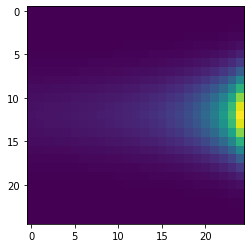

0.6780147182542106


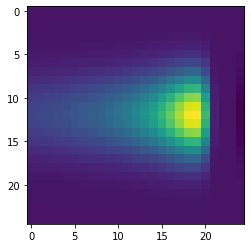

0.3451540517052283


/tmp/ipykernel_10089/2679446261.py:111: RuntimeWarning: overflow encountered in power
  return (A/z_bar)*np.exp(-np.power(B*z/z_bar, s))/U_bar


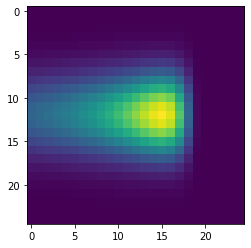

0.2203021300589469


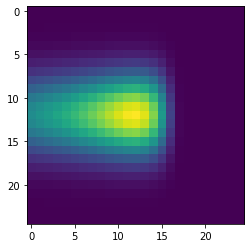

0.15779878813850134


/tmp/ipykernel_10089/2679446261.py:98: RuntimeWarning: overflow encountered in square
  return s*gamma(2/s)*(gamma(1/s)**2), gamma(2/s)*gamma(1/s)
/tmp/ipykernel_10089/2679446261.py:98: RuntimeWarning: overflow encountered in multiply
  return s*gamma(2/s)*(gamma(1/s)**2), gamma(2/s)*gamma(1/s)


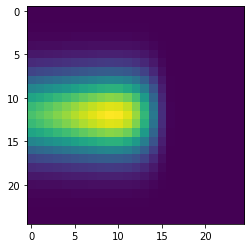

0.12102101450097177


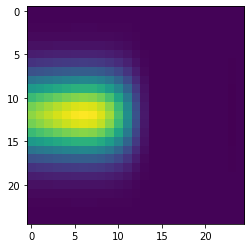

0.09648031246633049


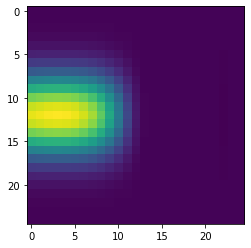

0.0797820858856142


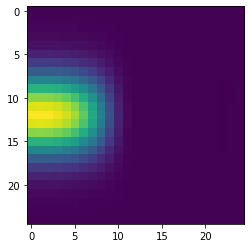

0.06492534468104136


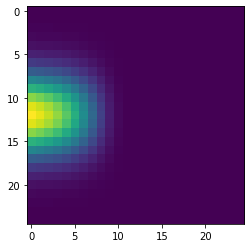

0.04987067373728403


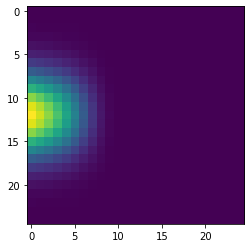

In [3]:
model = GaussianDispersionModel()
shape = 25
for j in np.linspace(0.1, 3, 10):
    x = np.linspace(-25, 25, shape)
    y = np.linspace(-2, 2, shape)
    x, y = np.meshgrid(x, y)
    z = np.ones_like(x)*1.5*j
    conc = model(1.0, x.reshape(-1), y.reshape(-1), z.reshape(-1))
    print(conc.max())
    plt.imshow(conc.reshape(shape, shape))
    plt.show()